<a href="https://colab.research.google.com/github/Jestika-safitri/jestika/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csvdf = pd.read_csv("/content/datasentiments.csv", sep=";")
df.head()

,tweet_cleans,sentimen
0,kerap termarjinalisasi perempuan perempuan pen...,negatif
1,tindakan semacam ini dapat dilaporkan kepada p...,positif
2,inilah contoh kekerasan dalam rumah tangga,positif
3,sertu iswanto babinsa kalurahan srihatjo bersa...,positif
4,kerap termarjinalisasi perempuan perempuan pen...,negatif


In [ ]:
df.drop(df.columns[[0]], axis= 1,inplace=True)
df

,sentimen
0,negatif
1,positif
2,positif
3,positif
4,negatif
...,...
2703,positif
2704,positif
2705,positif
2706,positif


In [ ]:
tweet_bar_df = df['sentimen'].value_counts()
print(f'index: {tweet_bar_df.index}')
print(f'values: {tweet_bar_df.values}')
print(f'all_values: {tweet_bar_df.sum()}')

index: Index(['positif', 'negatif'], dtype='object')
values: [2155  553]
all_values: 2708


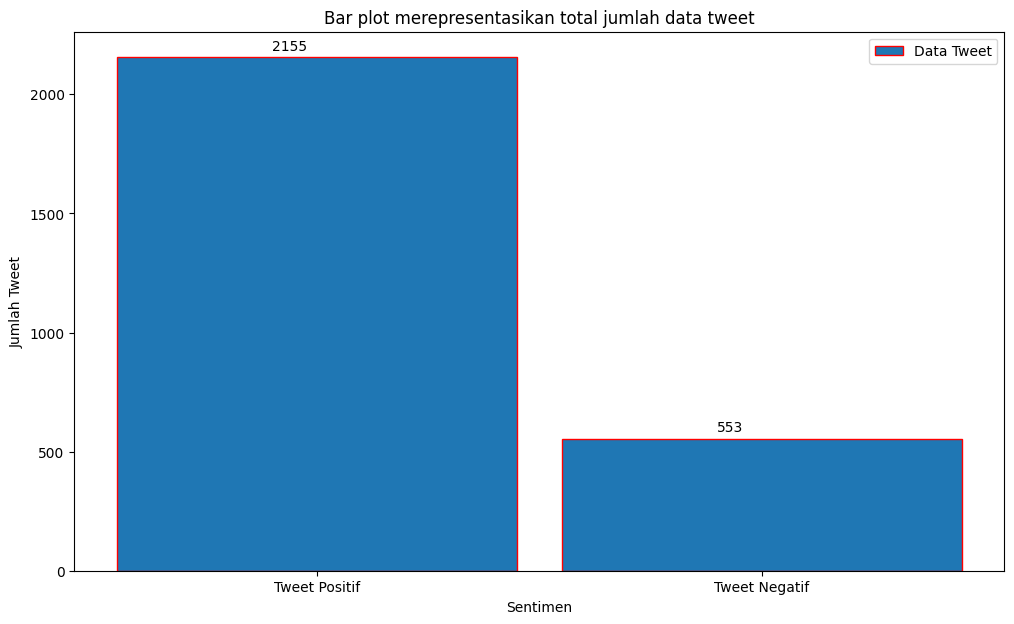

In [ ]:
plt.figure(figsize = (12,7))

sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)


i = 1.0
j = 30

for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))


plt.legend(labels = ['Data Tweet'])


plt.title("Bar plot merepresentasikan total jumlah data tweet")


plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')

# plt.savefig('barplot-tweet.png')

plt.show()


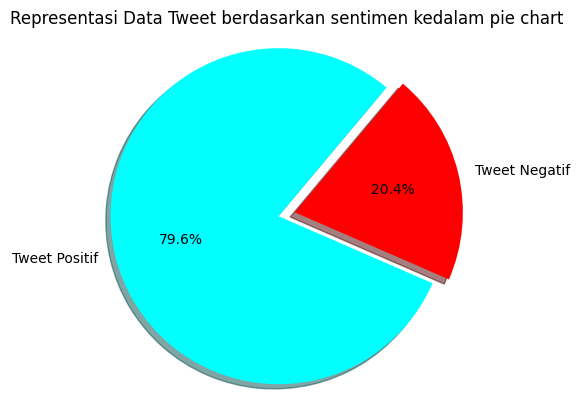

In [ ]:
my_labels = 'Tweet Positif','Tweet Negatif'
my_colors = ['aqua','red']

my_explode = (0, 0.1)
plt.pie(tweet_bar_df.values, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Representasi Data Tweet berdasarkan sentimen kedalam pie chart')
plt.axis('equal')

plt.show()

In [ ]:
df = pd.read_csvdf = pd.read_csv("/content/datasentiments.csv", sep=";")
df.head()

,tweet_cleans,sentimen
0,kerap termarjinalisasi perempuan perempuan pen...,negatif
1,tindakan semacam ini dapat dilaporkan kepada p...,positif
2,inilah contoh kekerasan dalam rumah tangga,positif
3,sertu iswanto babinsa kalurahan srihatjo bersa...,positif
4,kerap termarjinalisasi perempuan perempuan pen...,negatif


In [ ]:
# melakukan konversi sentimen ke label 0 untuk negatif dan 1 untuk positif
def convert_label_sentimen(label_sentimen):
    if label_sentimen == "positif":
        return 1
    else:
        return 0

df['label_sentimen'] = df['sentimen'].apply(convert_label_sentimen)
df.shape


(2708, 3)

In [ ]:
df

,tweet_cleans,sentimen,label_sentimen
0,kerap termarjinalisasi perempuan perempuan pen...,negatif,0
1,tindakan semacam ini dapat dilaporkan kepada p...,positif,1
2,inilah contoh kekerasan dalam rumah tangga,positif,1
3,sertu iswanto babinsa kalurahan srihatjo bersa...,positif,1
4,kerap termarjinalisasi perempuan perempuan pen...,negatif,0
...,...,...,...
2703,berkarya untuk bangsa selasa mei jaksa fungsio...,positif,1
2704,lalu muncul lah perselingkuhan kekerasan dalam...,positif,1
2705,thanks utasnya nadya nambahin dikit uu pkdrt u...,positif,1
2706,tiap ada temen yg cerita kekerasan dalam rumah...,positif,1


In [ ]:
df['label_sentimen'].value_counts()

1    2155
0     553
Name: label_sentimen, dtype: int64

In [ ]:
df.to_csv("label_sentimen.csv")

In [ ]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(df['tweet_cleans'], 
                                                    df['sentimen'], test_size=0.2, stratify=df['label_sentimen'], random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2166,), (542,), (2166,), (542,))

In [ ]:
X = df[['tweet_cleans', 'sentimen','label_sentimen']]
y = df[['tweet_cleans', 'sentimen','label_sentimen']]
print(X.shape)
print(y.shape)
     

(2708, 3)
(2708, 3)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1895, 3)
(813, 3)
(1895, 3)
(813, 3)


In [ ]:
tfidf_model = TfidfVectorizer(smooth_idf=False).fit(X_train)
X_train = tfidf_model.transform(X_train)
X_test = tfidf_model.transform(X_test)

ValueError: ignored

In [ ]:
tfidf_model = TfidfVectorizer(smooth_idf=False).fit(y_train)
y_train = tfidf_model.transform(y_train)
y_test = tfidf_model.transform(y_test)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predict = mnb.predict(X_test)
print(predict)

TypeError: ignored

In [ ]:
#simpan tfidf model
filename_tfidf = 'tfidf.pkl'
pickle.dump(tfidf_model, open(filename_tfidf, 'wb'))

In [ ]:
# simpan naive bayes model
with open('model_analisis.pkl', 'wb') as r:
    pickle.dump(mnb, r)

NameError: ignored

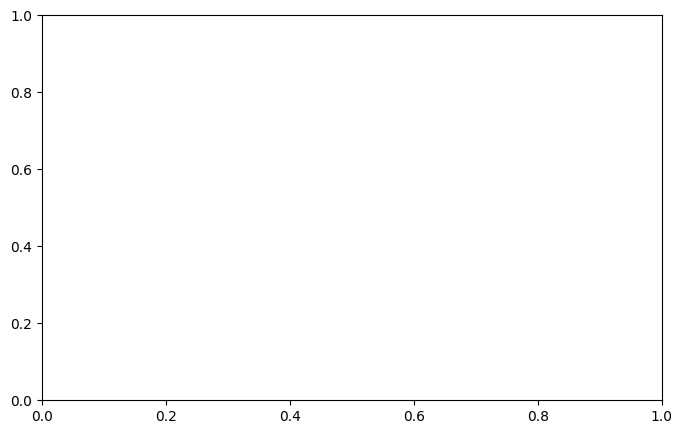

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict))